# for LLama3.2 fine tuning eval values


<ipython-input-11-5a1a3ea70765>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_means_by_type = df.groupby(['Type', 'Data_int'])['Overall'].mean().unstack()


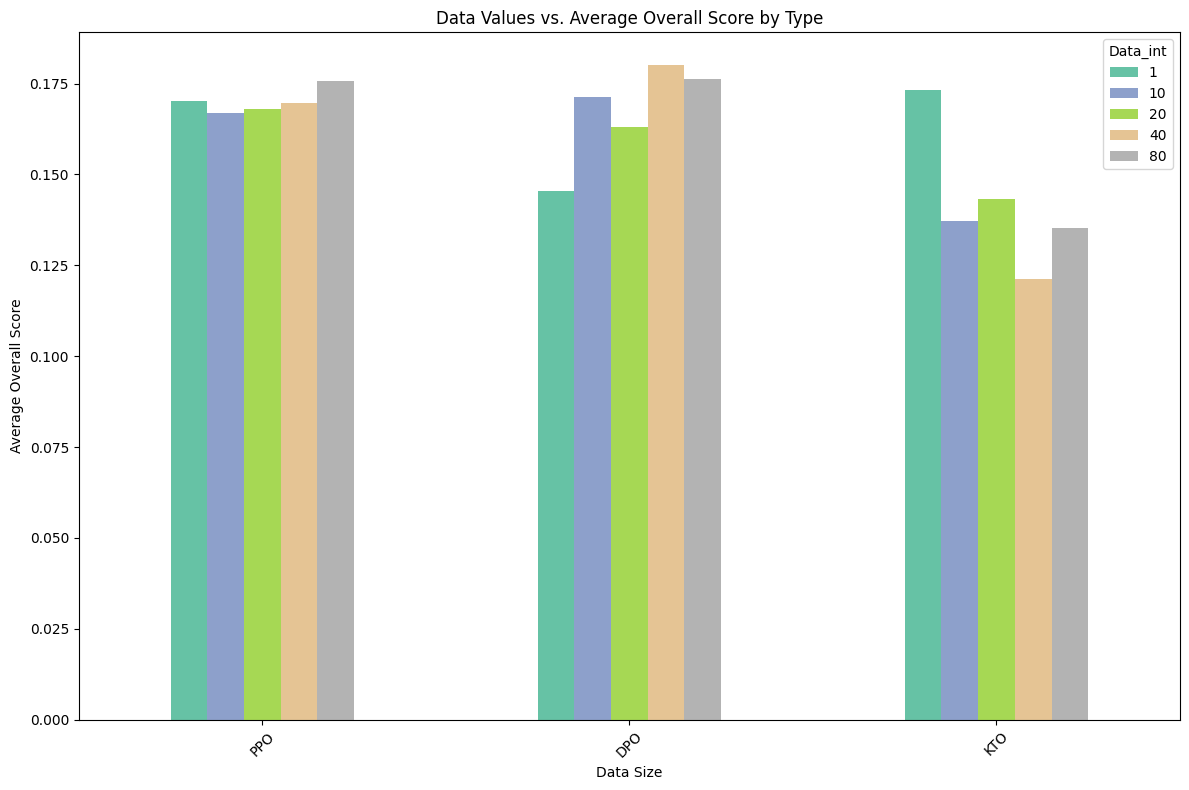

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (make sure to specify the correct file path)
df = pd.read_csv('/content/llama_factory_test_results.csv')  # You need to upload your CSV file here

# Remove the 'k' characters from the "Data" column and convert it to a number
df['Data_int'] = df['Data'].str.replace('k', '').astype(int)

# Sort the distinct values in the "Data_int" column in ascending order
data_values = sorted(df['Data_int'].unique())
data_values = [str(value) for value in data_values]
df['Data_int'] = df['Data'].str.replace('k', '').astype(str)

# Replace non-numeric values with None or 0
df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce').fillna(0)  # Converts non-numeric values to 0

# Set the order for the "Type" column as PPO, DPO, and KTO
type_order = ['PPO', 'DPO', 'KTO']
df['Type'] = pd.Categorical(df['Type'], categories=type_order, ordered=True)

# Calculate the average "Overall" score for each "Type" and "Data_int"
overall_means_by_type = df.groupby(['Type', 'Data_int'])['Overall'].mean().unstack()

# Visualization for the bar graph
plt.figure(figsize=(12, 8))

# Plot the data for each "Type"
overall_means_by_type.plot(kind='bar', ax=plt.gca(), colormap='Set2')

# Set the title and labels for the graph
plt.title("Data Values vs. Average Overall Score by Type")
plt.xlabel("Data Size")
plt.ylabel("Average Overall Score")
plt.xticks(rotation=45)

# Show the graph
plt.tight_layout()
plt.show()


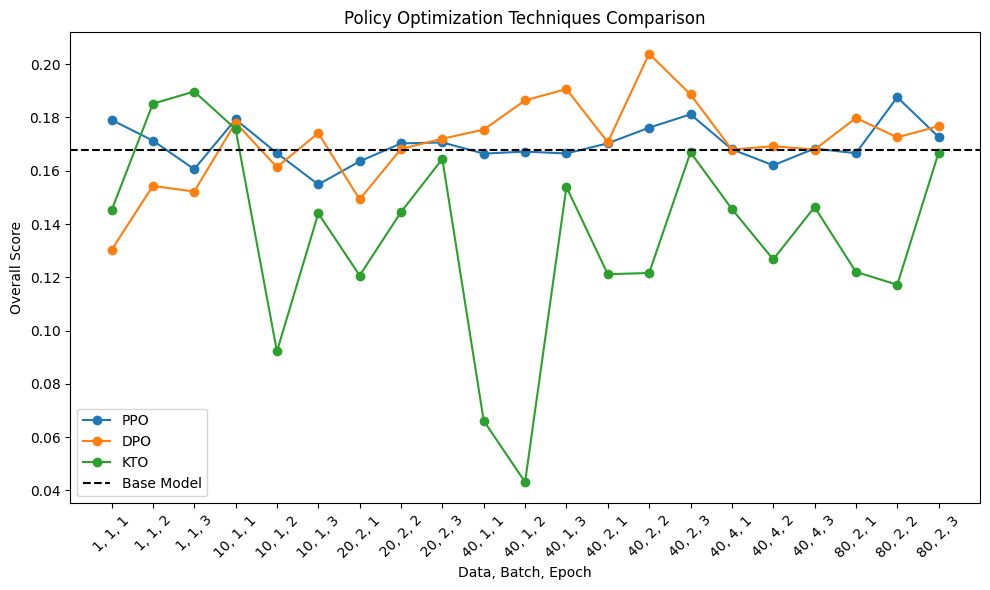

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Load the CSV file
df = pd.read_csv('/content/llama_factory_test_results.csv')  # You need to upload your CSV file here

# 📌 Replace non-numeric values with None or 0
df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce').fillna(0)  # Convert non-numeric values to 0

# 📌 Remove 'k' characters from the "Data" column and convert to integer
df['Data_int'] = df['Data'].str.replace('k', '').astype(int)

# 📌 Combine "Data_int", "Batch", and "Epoch" columns and use them for the X-axis
df['X'] = df['Data_int'].astype(str) + ', ' + df['Batch'].astype(str) + ', ' + df['Epoch'].astype(str)

# 📌 Sort the X-axis
df['X_order'] = df['Data_int'] * 1000000 + df['Batch'] * 1000 + df['Epoch']
df = df.sort_values(by='X_order')

# 📌 Base model score
base_model_score = 0.1676238

# 📌 Create the X-axis combinations for the graph
plt.figure(figsize=(10, 6))

# 📌 Plot the lines for PPO, DPO, and KTO
for label in ['PPO', 'DPO', 'KTO']:  # We also include KTO
    subset = df[df['Type'] == label]
    plt.plot(subset['X'], subset['Overall'], marker='o', label=label)

# 📌 Add the base model score as a dashed line
plt.axhline(base_model_score, color='black', linestyle='--', label='Base Model')

# 📌 Set the graph title and labels
plt.title("Policy Optimization Techniques Comparison")
plt.xlabel("Data, Batch, Epoch")
plt.ylabel("Overall Score")
plt.xticks(rotation=45)
plt.legend()

# 📌 Display the graph
plt.tight_layout()
plt.show()


<ipython-input-12-44ab12d86a1b>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(types))


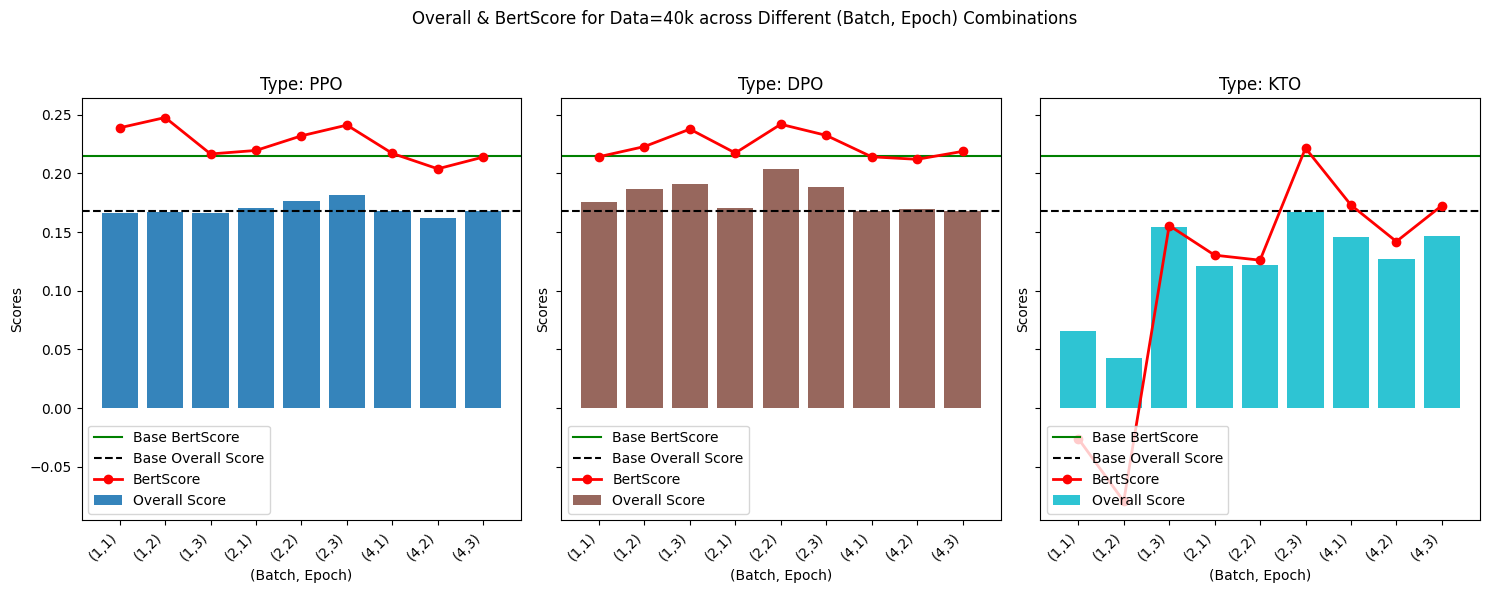

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file (make sure to specify the correct file path)
df = pd.read_csv('/content/llama_factory_test_results.csv')  # Update the file path as per your system

# Remove the 'k' characters from the "Data" column and convert it to a number
df['Data_int'] = df['Data'].str.replace('k', '').astype(int)

# Filter rows where the "Data" value is 40k
df_filtered = df[df['Data_int'] == 40].copy()

# Replace non-numeric values with None or 0
df_filtered['Overall'] = pd.to_numeric(df_filtered['Overall'], errors='coerce').fillna(0)
df_filtered['BertScore'] = pd.to_numeric(df_filtered['BertScore'], errors='coerce').fillna(0)

# Sort Batch and Epoch in ascending order (first by Batch, then by Epoch)
df_filtered = df_filtered.sort_values(by=['Batch', 'Epoch'])

# Create a new column by combining Batch and Epoch as a string
df_filtered['Batch_Epoch'] = df_filtered.apply(lambda row: f"({row['Batch']},{row['Epoch']})", axis=1)

# Get unique values from the "Type" column
types = df_filtered['Type'].unique()

# Define base model and BertScore values
base_model_score = 0.1676238
bert_score_value = 0.214885

# Plotting the graph
fig, axes = plt.subplots(nrows=1, ncols=len(types), figsize=(15, 6), sharey=True)

# Choose a color palette
colors = plt.cm.get_cmap('tab10', len(types))

for i, t in enumerate(types):
    ax = axes[i]
    type_df = df_filtered[df_filtered['Type'] == t]

    # Extract Overall and BertScore values based on Batch-Epoch combinations
    x_labels = type_df['Batch_Epoch'].values
    y_values_overall = type_df['Overall'].values
    y_values_bert = type_df['BertScore'].values

    # Add horizontal lines for the base model and BertScore
    ax.axhline(bert_score_value, color='green', linestyle='solid', label='Base BertScore')
    ax.axhline(base_model_score, color='black', linestyle='--', label='Base Overall Score')

    # Bar graph for Overall score
    ax.bar(x_labels, y_values_overall, color=colors(i), alpha=0.9, label="Overall Score")

    # Line graph for BertScore
    ax.plot(x_labels, y_values_bert, color='red', marker='o', linestyle='-', linewidth=2, label="BertScore")

    ax.set_title(f'Type: {t}')
    ax.set_xlabel('(Batch, Epoch)')
    ax.set_ylabel('Scores')
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha="right")
    ax.legend(loc="lower left")

plt.suptitle('Overall & BertScore for Data=40k across Different (Batch, Epoch) Combinations')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


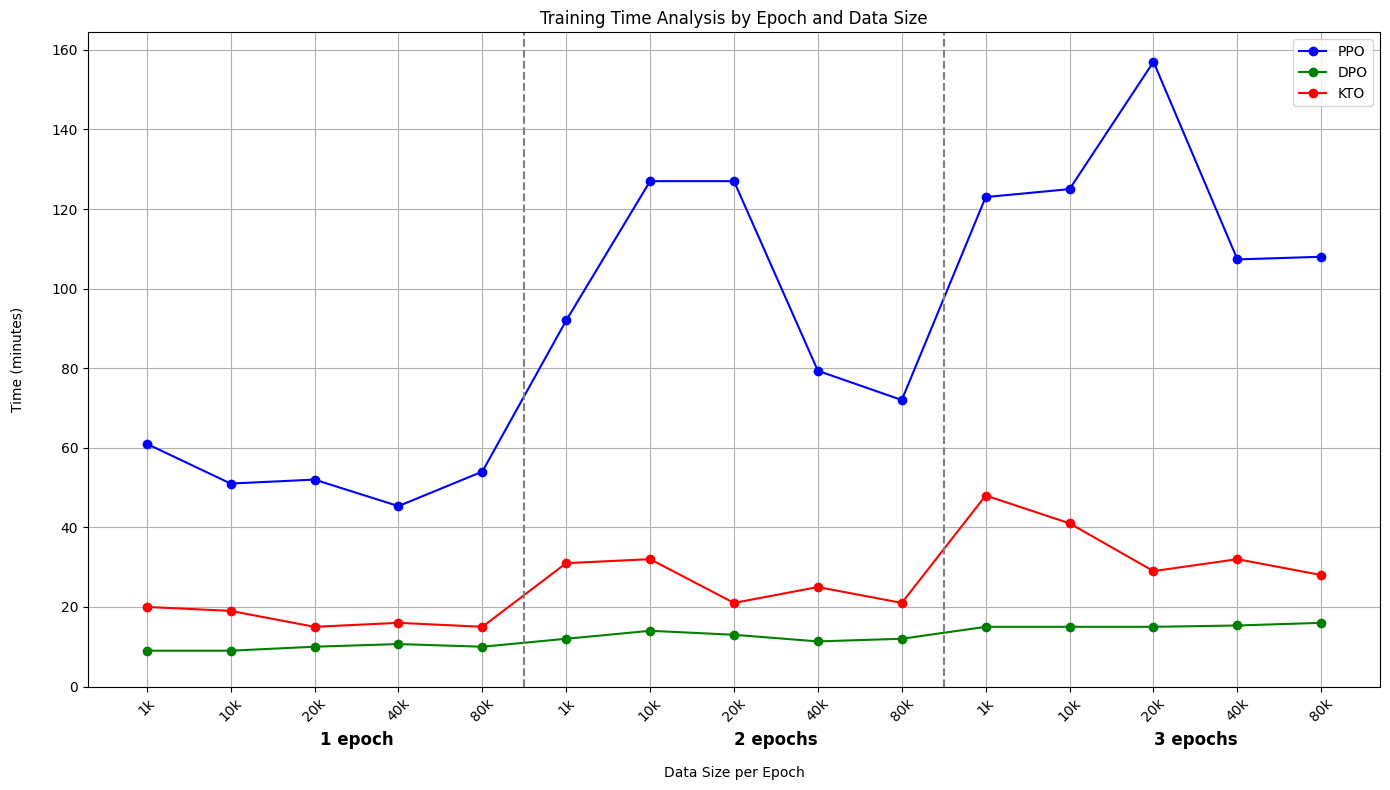

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/llama_factory_test_results.csv')

# Remove the 'k' characters from the "Data" column and convert it to an integer
df['Data_int'] = df['Data'].str.replace('k', '').astype(int)
df['Epoch'] = df['Epoch'].astype(int)

# Convert the "Time" column from hh:mm format to seconds
df['Time'] = df['Time'].astype(str).fillna('0:00')
df = df[df['Time'].str.match(r'^\d+:\d+$', na=False)]
df['Time_seconds'] = df['Time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Sort the Epoch and Data values
epochs_sorted = sorted(df['Epoch'].unique())
data_sorted = sorted(df['Data_int'].unique())

# Prepare for graph plotting
plt.figure(figsize=(14, 8))

# Loop for PPO, DPO, and KTO
types = ['PPO', 'DPO', 'KTO']
colors = ['blue', 'green', 'red']

for t, c in zip(types, colors):
    df_type = df[df['Type'] == t]

    time_values = []
    x_labels = []

    for epoch in epochs_sorted:
        for data in data_sorted:
            subset = df_type[(df_type['Epoch'] == epoch) & (df_type['Data_int'] == data)]
            if not subset.empty:
                avg_time = subset['Time_seconds'].mean()
                time_values.append(avg_time)
                x_labels.append(f"{data}k")

    plt.plot(time_values, marker='o', label=t, color=c)

# Custom x-axis labels
x_tick_positions = []
x_tick_labels = []

for i, epoch in enumerate(epochs_sorted):
    for data in data_sorted:
        x_tick_positions.append(len(data_sorted) * i + data_sorted.index(data))
        x_tick_labels.append(f"{data}k")

# Set x-axis settings (show data sizes, display epoch labels only once)
plt.xticks(x_tick_positions, x_tick_labels, rotation=45)

# Place epoch labels immediately below the data size labels
epoch_label_positions = [len(data_sorted) * i + (len(data_sorted) / 2) for i in range(len(epochs_sorted))]
epoch_labels = [f"{epoch} epoch" if epoch <2 else f"{epoch} epochs" for epoch in epochs_sorted ]

y_min, y_max = plt.ylim()
y_label_position = y_min - (y_max - y_min) * 0.1  # Add below the graph

for pos, label in zip(epoch_label_positions, epoch_labels):
    plt.text(pos, y_label_position, label, ha='center', fontsize=12, fontweight='bold')

# Add vertical lines to separate epoch sections
for i in range(1, len(epochs_sorted)):
    plt.axvline(x=i * len(data_sorted) - 0.5, color='gray', linestyle='--')

# Set graph title and labels
plt.title("Training Time Analysis by Epoch and Data Size")

# Set y-axis labels to increase in steps of 20
y_ticks = range(0, int(y_max), 20)
plt.yticks(y_ticks)

plt.xlabel("Data Size per Epoch", labelpad=30)
plt.ylabel("Time (minutes)", labelpad=20)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Read the CSV file
df = pd.read_csv("/content/llama_ai_scores.csv")  # Change the file name accordingly

# 📌 Filter by "Type"
ppo_df = df[df["Type"] == "PPO"]
dpo_df = df[df["Type"] == "DPO"]
kto_df = df[df["Type"] == "KTO"]

# 📌 Select numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns

# 📌 Calculate the correlation matrices
ppo_corr = ppo_df[numeric_columns].corr()
dpo_corr = dpo_df[numeric_columns].corr()
kto_corr = kto_df[numeric_columns].corr()

# 📌 Function to visualize and save the correlation matrices
def plot_corr_matrix(corr_matrix, title, file_name):
    """
    Visualizes the correlation matrix using a heatmap and saves it as an image.

    Parameters:
    corr_matrix (DataFrame): The correlation matrix to visualize.
    title (str): The title to display on the heatmap.
    file_name (str): The name of the file to save the image as.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.tight_layout()  # Ensure everything fits within the figure
    plt.savefig(file_name, format='png')  # Save as PNG (can change format to 'jpeg' if desired)
    plt.close()  # Close the plot to avoid it being shown during subsequent iterations

# 📌 Visualize and save the correlation matrices
plot_corr_matrix(ppo_corr, "Proximal Policy Optimization", "ppo_correlation.png")
plot_corr_matrix(dpo_corr, "Direct Preference Optimization", "dpo_correlation.png")
plot_corr_matrix(kto_corr, "Kahneman-Tversky Optimization", "kto_correlation.png")
